<a href="https://colab.research.google.com/github/JFA000/Estudos/blob/main/Iris_Dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [48]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris # Lendo o dataset iris
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from scipy.cluster.hierarchy import dendrogram, linkage

iris = load_iris()
X = iris.data
y = iris.target

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

print("Dados carregados e padronizados!")

Dados carregados e padronizados!


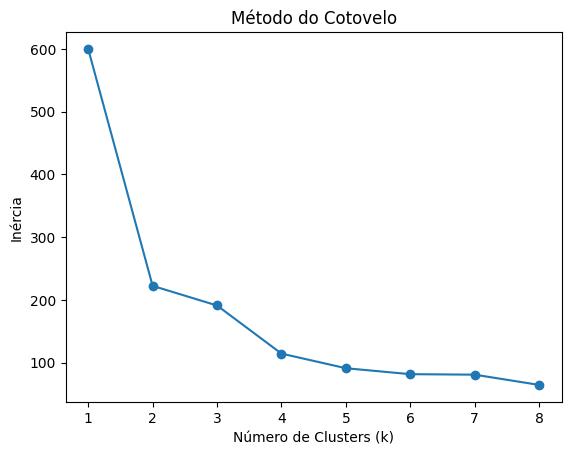

In [49]:
# Método do cotovelo para escolher k
inertias = []
for k in range(1, 9):
    kmeans_test = KMeans(n_clusters=k, random_state=42)
    kmeans_test.fit(X_scaled)
    inertias.append(kmeans_test.inertia_)

plt.plot(range(1, 9), inertias, marker='o')
plt.title('Método do Cotovelo')
plt.xlabel('Número de Clusters (k)')
plt.ylabel('Inércia')
plt.show()

In [50]:
#Com o número em 10  no gráfico para descobrimento, pode-se ver o cotovelo em 3~, então escolho 3 como k

kmeans = KMeans(n_clusters=3, random_state=42) #Número de clusters em 3
kmeans.fit(X_scaled)
labels_kmeans = kmeans.labels_

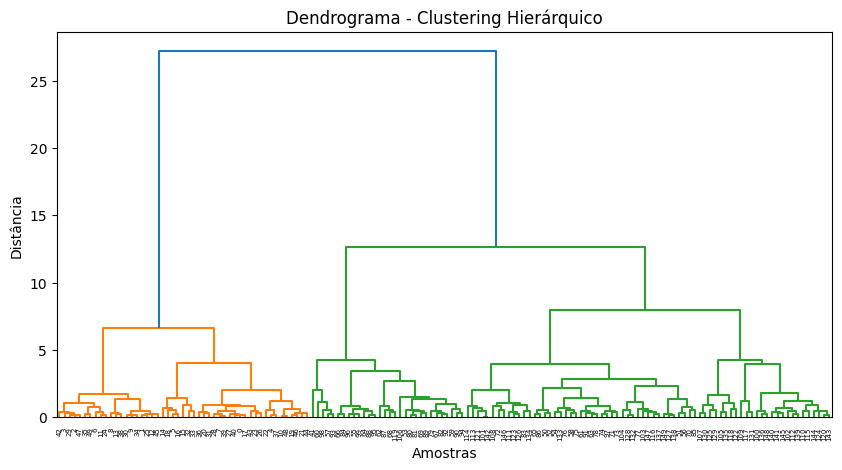

In [51]:
# Calcular a matriz de ligação para clustering hierárquico (método Ward)
Z = linkage(X_scaled, method='ward')

# Plotar o dendrograma, que mostra como os pontos são agrupados.

plt.figure(figsize=(10, 5))
dendrogram(Z)
plt.title('Dendrograma - Clustering Hierárquico')
plt.xlabel('Amostras')
plt.ylabel('Distância')
plt.show()

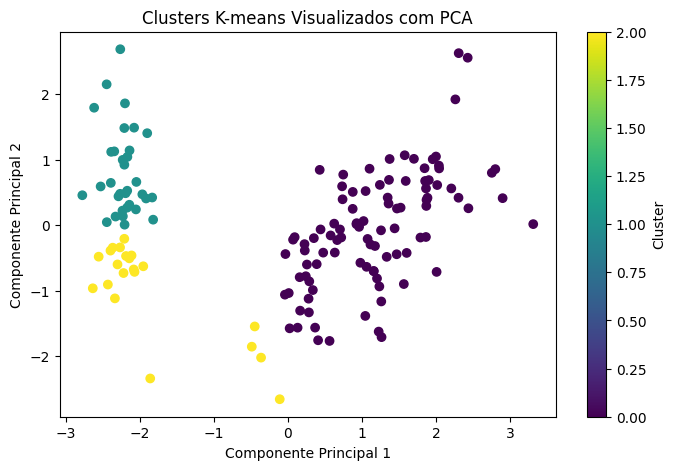

Variância explicada pelos 2 componentes: 95.81%
Explicação: PCA reduz os dados para 2D, mantendo a maior parte da variância (geralmente 50-60% neste caso). Os clusters são visíveis em cores diferentes.


In [60]:
# Aplicar PCA (Principal Component Analysis - Análise de Componentes Principais)
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

plt.figure(figsize=(8, 5))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=labels_kmeans, cmap='viridis')
plt.title('Clusters K-means Visualizados com PCA')
plt.xlabel('Componente Principal 1')
plt.ylabel('Componente Principal 2')
plt.colorbar(label='Cluster')
plt.show()

print(f"Variância explicada pelos 2 componentes: {sum(pca.explained_variance_ratio_):.2%}")

print("Explicação: PCA reduz os dados para 2D, mantendo a maior parte da variância (geralmente 50-60% neste caso). Os clusters são visíveis em cores diferentes.")

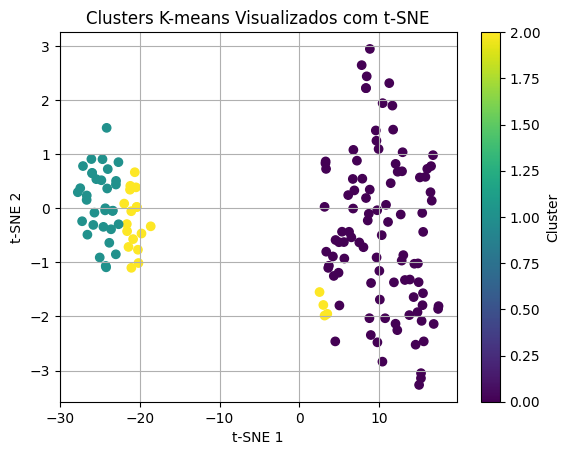

Interpretação (exemplo):
- Cluster 0: flores com pétalas pequenas (provavelmente Iris-setosa).
- Cluster 1: flores com pétalas médias (pode corresponder à Iris-versicolor).
- Cluster 2: flores com pétalas longas e largas (provavelmente Iris-virginica).


In [53]:
# Aplicar t-SNE (t-Distributed Stochastic Neighbor Embedding)
tsne = TSNE(n_components=2, random_state=42)
X_tsne = tsne.fit_transform(X_scaled)

# Visualizar os clusters do k-means com t-SNE
plt.scatter(X_tsne[:, 0], X_tsne[:, 1], c=labels_kmeans, cmap='viridis')
plt.title('Clusters K-means Visualizados com t-SNE')
plt.xlabel('t-SNE 1')
plt.ylabel('t-SNE 2')
plt.colorbar(label='Cluster')
plt.grid(True)
plt.show()

#print("Explicação: t-SNE foca em preservar vizinhanças locais, geralmente mostrando clusters mais separados que o PCA, mas sem garantir variância total explicada.")

print("Interpretação (exemplo):")
print("- Cluster 0: flores com pétalas pequenas (provavelmente Iris-setosa).")
print("- Cluster 1: flores com pétalas médias (pode corresponder à Iris-versicolor).")
print("- Cluster 2: flores com pétalas longas e largas (provavelmente Iris-virginica).")

In [54]:
# Criar DataFrame com os nomes das variáveis
df = pd.DataFrame(X, columns=iris.feature_names)
df['cluster'] = labels_kmeans

# Mostrar a média das características por cluster
cluster_means = df.groupby('cluster').mean()
print("\nMédia das características por cluster:")
print(cluster_means)


Média das características por cluster:
         sepal length (cm)  sepal width (cm)  petal length (cm)  \
cluster                                                           
0                 6.314583          2.895833           4.973958   
1                 5.169697          3.630303           1.493939   
2                 4.747619          2.895238           1.757143   

         petal width (cm)  
cluster                    
0                1.703125  
1                0.272727  
2                0.352381  


**Dedução final com base nos resultados**

Cluster 0:
- Média comprimento pétala: 4.97
- Média largura pétala: 1.70
- Média comprimento sépala: 6.31
- Média largura sépala: 2.90

Provavelmente representa: Iris-virginica

Cluster 1:
- Média comprimento pétala: 1.49
- Média largura pétala: 0.27
- Média comprimento sépala: 5.17
- Média largura sépala: 3.63

Provavelmente representa: Iris-setosa

Cluster 2:
- Média comprimento pétala: 1.76
- Média largura pétala: 0.35
- Média comprimento sépala: 4.75
- Média largura sépala: 2.90

Provavelmente representa: Iris-versicolor